In [1]:
import tensorflow as tf
import numpy as np

print("✅ TensorFlow version:", tf.__version__)
print("✅ Keras version:", tf.keras.__version__)
print("✅ NumPy version:", np.__version__)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("🚀 GPU is available:", gpus)
else:
    print("⚠️ GPU not detected, running on CPU")


✅ TensorFlow version: 2.19.0
✅ Keras version: 3.10.0
✅ NumPy version: 2.1.3
⚠️ GPU not detected, running on CPU


In [1]:
import numpy as np 
import pandas as pd 
import os
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
#!pip install tensorflow==2.19.0
import tensorflow as tf
print(tf.__version__)


2.19.0


In [2]:
train = "/kaggle/input/leaf-disease-dataset-combination/image data/train" 
test = "/kaggle/input/leaf-disease-dataset-combination/image data/test" 
validation = "/kaggle/input/leaf-disease-dataset-combination/image data/validation" 

In [ ]:
def count_image(directory) :  
    categories = os.listdir(directory)
    category_count = {
        category : len(os.listdir(os.path.join(directory,category ))) for category in categories
    }
    return category_count 

In [4]:
train_count = count_image(train) 
print(f"the train count : {train_count}")
print("-----------------------")
test_count = count_image(test) 
print(f"the test count : {test_count}") 
print("-----------------------")
validation_count = count_image(validation) 
print(f"the validation : {validation_count}") 

the train count : {'orange': 13, 'tomato': 13, 'apple': 13, 'strawberry': 13, 'corn (maize)': 13, 'Cassava': 13, 'cherry (including sour)': 13, 'pepper, bell': 13, 'squash': 13, 'peach': 13, 'grape': 13, 'Rice': 13, 'potato': 13}
-----------------------
the test count : {'orange': 13, 'tomato': 13, 'apple': 13, 'strawberry': 13, 'corn (maize)': 13, 'Cassava': 13, 'cherry (including sour)': 13, 'pepper, bell': 13, 'squash': 13, 'peach': 13, 'grape': 13, 'Rice': 13, 'potato': 13}
-----------------------
the validation : {'orange': 13, 'tomato': 13, 'apple': 13, 'strawberry': 13, 'corn (maize)': 13, 'Cassava': 13, 'cherry (including sour)': 13, 'pepper, bell': 13, 'squash': 13, 'peach': 13, 'grape': 13, 'Rice': 13, 'potato': 13}


In [5]:
df_train = pd.DataFrame(list(train_count.items()) , columns = ["vagetable" , "train count"])  
df_test = pd.DataFrame(list(test_count.items()) , columns  = ["vagetable" , "test count"]) 
df_validation = pd.DataFrame(list(validation_count.items()) , columns = ["vagetable" , "validation count"])


In [6]:
df = pd.merge(df_train ,df_test , on = "vagetable")
df = pd.merge(df ,df_validation , on ="vagetable" )
df 

,vagetable,train count,test count,validation count
0,orange,13,13,13
1,tomato,13,13,13
2,apple,13,13,13
3,strawberry,13,13,13
4,corn (maize),13,13,13
5,Cassava,13,13,13
6,cherry (including sour),13,13,13
7,"pepper, bell",13,13,13
8,squash,13,13,13
9,peach,13,13,13


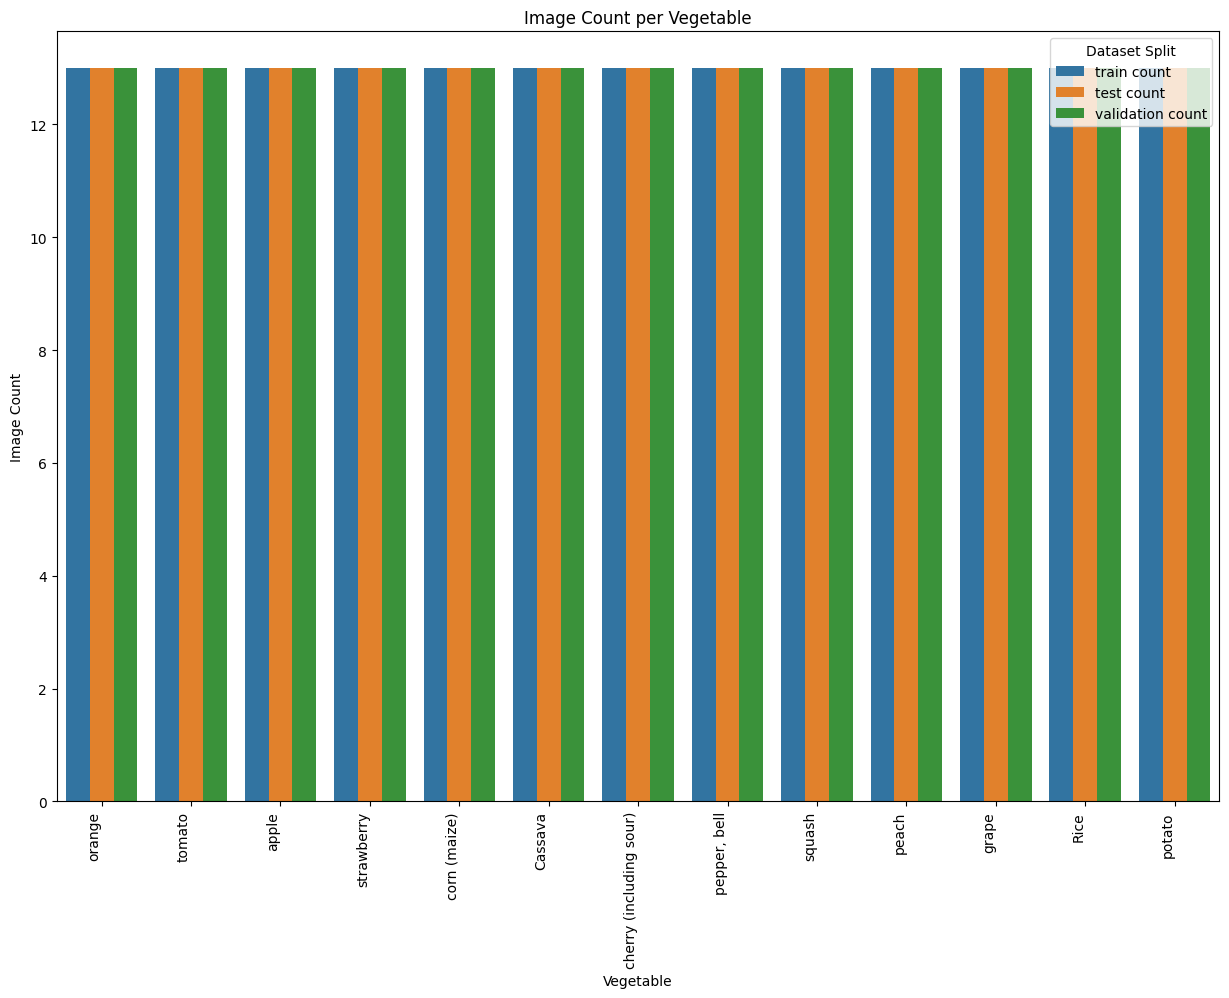

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns 



df_melted = df.melt(
    id_vars="vagetable",
    value_vars=['train count', 'test count', 'validation count'],
    var_name="dataset split",
    value_name="image count"
)

plt.figure(figsize=(15,10))


sns.barplot(data=df_melted, x='vagetable', y='image count', hue='dataset split')


plt.xticks(rotation=90, ha='right')  
plt.xlabel('Vegetable')
plt.ylabel('Image Count')
plt.title('Image Count per Vegetable')


plt.legend(title='Dataset Split')
plt.show()

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,           
    rotation_range=20,        
    width_shift_range=0.2,    
    height_shift_range=0.2,   
    shear_range=0.2,          
    zoom_range=0.2,           
    horizontal_flip=True,     
    validation_split=0.2      
)


val_datagen = ImageDataGenerator(
    rescale=1./255,  
    validation_split=0.2
)


train_ds = train_datagen.flow_from_directory(
    "/kaggle/input/leaf-disease-dataset-combination/image data/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training",  
    seed=42,
    shuffle=True
)


val_ds = val_datagen.flow_from_directory(
    "/kaggle/input/leaf-disease-dataset-combination/image data/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation",  
    seed=42
)


2025-07-19 16:12:03.975409: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752941524.178929      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752941524.243436      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 30489 images belonging to 13 classes.
Found 7615 images belonging to 13 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D ,Dense , Flatten , Dropout  

model = Sequential ([
    Conv2D(64 , (3,3) , activation='relu' , input_shape=(224,224,3)) , 
    MaxPooling2D(2,2) , 
    Conv2D(128 , (3,3) , activation='relu' ) ,
    MaxPooling2D(2,2) , 
    Conv2D (256 ,(3,3) ,  activation='relu') ,
    MaxPooling2D(2,2) ,
    Conv2D (400 ,(3,3) ,  activation='relu') ,
    MaxPooling2D(2,2) ,

    Flatten () , 
    
    Dense(512 , activation='relu'),
    Dropout(0.5),
    Dense(13 , activation="softmax")
    
    
])

I0000 00:00:1752941559.484100      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [10]:
model.compile (optimizer = "adam" , 
               loss = "categorical_crossentropy" , 
                metrics=['accuracy']
               
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 400)    │       922,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 400)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    29,491,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 13)             │         6,669 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,791,197 (117.46 MB)

 Trainable params: 30,791,197 (117.46 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import  EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 438s 460ms/step - accuracy: 0.5004 - loss: 1.6106 - val_accuracy: 0.6075 - val_loss: 1.2112
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 345s 362ms/step - accuracy: 0.7414 - loss: 0.7835 - val_accuracy: 0.7162 - val_loss: 0.8446
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 345s 362ms/step - accuracy: 0.8331 - loss: 0.5042 - val_accuracy: 0.7673 - val_loss: 0.7325
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 362s 380ms/step - accuracy: 0.8778 - loss: 0.3747 - val_accuracy: 0.7966 - val_loss: 0.5979
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 354s 372ms/step - accuracy: 0.9003 - loss: 0.3097 - val_accuracy: 0.8038 - val_loss: 0.6481
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 353s 371ms/step - accuracy: 0.9140 - loss: 0.2734 - val_accuracy: 0.8038 - val_loss: 0.6113
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 356s 374ms/step - accuracy: 0.9245 - loss: 0.2323 - val_accuracy: 0.8685 - val_loss: 0.3904
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 353s 370ms/step - accuracy: 0.9325 -

In [13]:
train_loss , train_acc = model.evaluate(train_ds) 
print(f"the train accuracy:{train_acc * 100:.2f}%") 
val_loss , val_acc = model.evaluate(val_ds) 
print(f"the val_accuracy : { val_acc*100:.2f}%") 


953/953 ━━━━━━━━━━━━━━━━━━━━ 340s 357ms/step - accuracy: 0.9545 - loss: 0.1392
the train accuracy:95.59%
238/238 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - accuracy: 0.9138 - loss: 0.2816
the val_accuracy : 91.08%


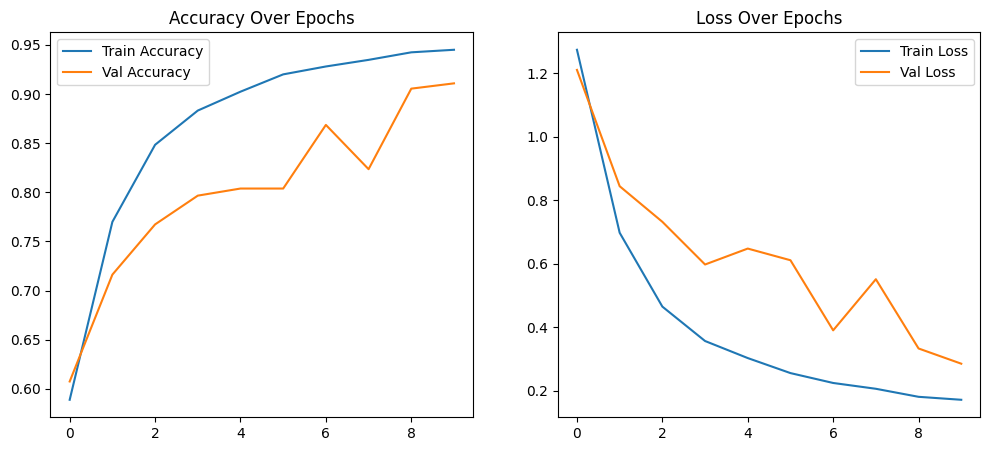

In [17]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Train Accuracy")
plt.plot(epochs_range, val_acc, label="Val Accuracy")
plt.legend()
plt.title("Accuracy Over Epochs")


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Train Loss")
plt.plot(epochs_range, val_loss, label="Val Loss")
plt.legend()
plt.title("Loss Over Epochs")

plt.show()


In [ ]:
y_true = [] 
y_pred = [] 
for images , labels in val_ds : 
    pred = model.predict(images) 
    y_pred.extend(np.argmax(pred , axis=1))
    y_true.extend(np.argmax(labels , axis=1)) 


y_true = np.argmax(y_true) 
y_pred = np.argmax(y_pred)

In [ ]:
from sklearn.metrics import classification_report
class_name  = list(val_ds.class_indices_key())

print(classification_report(y_true , y_pred , target_name = class_name))

In [ ]:
import matplotlib.pyplot as plt

images, labels = next(iter(val_ds))

num_images = 9

plt.figure(figsize=(12, 12))
for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {np.argmax(labels[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()



In [20]:
model.save("Leaf Disease.h5")